In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
pd.set_option('display.max_columns', None)
# Preview data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

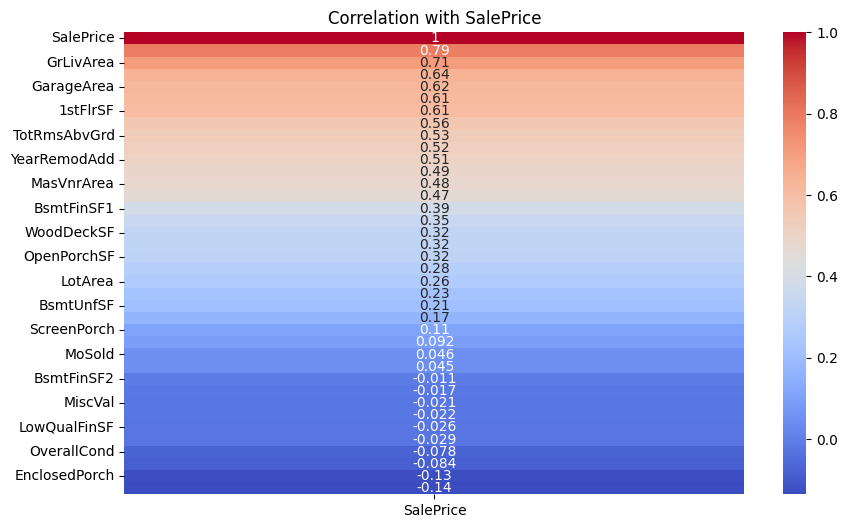

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


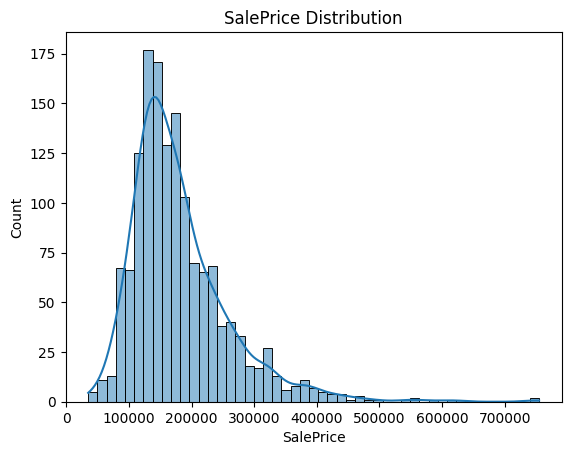

Skewness of SalePrice: 1.88


In [8]:
# EDA

# Check basic info
print(train_df.info())

# Check missing values
# Display all columns in the output
pd.set_option('display.max_rows', None)
# Now running missing value check
missing = train_df.isnull().sum()
print("Missing Values:\n", missing[missing > 0].sort_values(ascending=False))

# Check data types
print("\nData Types:\n", train_df.dtypes)

# Correlation with target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with SalePrice")
plt.show()

# Check target distribution
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

from scipy.stats import skew
skewness = skew(train_df['SalePrice'])
print(f"Skewness of SalePrice: {skewness:.2f}")

In [14]:
# Data Cleaning

# Impute missing values for numerical columns
num_cols_with_na = train_df.select_dtypes(include=['number']).columns[train_df.select_dtypes(include=['number']).isnull().any()]

for col in num_cols_with_na:
    train_df.fillna({col:train_df[col].median()}, inplace=True)

# Checking if any missing values remain
missing = train_df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# Re-checking only the numeric columnstargeted
num_cols_with_na = train_df.select_dtypes(include=['number']).columns[train_df.select_dtypes(include=['number']).isnull().any()]
print("Still missing after fill (numeric):", list(num_cols_with_na))

# Encode categorical variables
train_df = pd.get_dummies(train_df)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64
Still missing after fill (numeric): []


In [18]:
# Feature Engineering

from copy import deepcopy
train_df_sub = deepcopy(train_df[['YearBuilt','GrLivArea','1stFlrSF','TotRmsAbvGrd','YearRemodAdd','SalePrice']])
train_df_sub

,YearBuilt,GrLivArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,SalePrice
0,2003,1710,856,8,2003,208500
1,1976,1262,1262,6,1976,181500
2,2001,1786,920,6,2002,223500
3,1915,1717,961,7,1970,140000
4,2000,2198,1145,9,2000,250000
5,1993,1362,796,5,1995,143000
6,2004,1694,1694,7,2005,307000
7,1973,2090,1107,7,1973,200000
8,1931,1774,1022,8,1950,129900
9,1939,1077,1077,5,1950,118000


In [20]:
x_train, y_train = train_df_sub.to_numpy()[:,:-1],  train_df_sub.to_numpy()[:,-1]
x_train, y_train

(array([[2003, 1710,  856,    8, 2003],
        [1976, 1262, 1262,    6, 1976],
        [2001, 1786,  920,    6, 2002],
        ...,
        [1941, 2340, 1188,    9, 2006],
        [1950, 1078, 1078,    5, 1996],
        [1965, 1256, 1256,    6, 1965]]),
 array([208500, 181500, 223500, ..., 266500, 142125, 147500]))

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
train_df_sub['model_predictions'] = rf.predict(x_train)
train_df_sub

,YearBuilt,GrLivArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,SalePrice,model_predictions
0,2003,1710,856,8,2003,208500,203135.000000
1,1976,1262,1262,6,1976,181500,169601.360000
2,2001,1786,920,6,2002,223500,218777.000000
3,1915,1717,961,7,1970,140000,146067.500000
4,2000,2198,1145,9,2000,250000,251561.000000
5,1993,1362,796,5,1995,143000,152489.320000
6,2004,1694,1694,7,2005,307000,286815.560000
7,1973,2090,1107,7,1973,200000,190997.500000
8,1931,1774,1022,8,1950,129900,140381.500000
9,1939,1077,1077,5,1950,118000,114800.590000


In [23]:
test_df_sub = deepcopy(test_df[['YearBuilt','GrLivArea','1stFlrSF','TotRmsAbvGrd','YearRemodAdd']])
test_df_sub

,YearBuilt,GrLivArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd
0,1961,896,896,5,1961
1,1958,1329,1329,6,1958
2,1997,1629,928,6,1998
3,1998,1604,926,7,1998
4,1992,1280,1280,5,1992
5,1993,1655,763,7,1994
6,1992,1187,1187,6,2007
7,1998,1465,789,7,1998
8,1990,1341,1341,5,1990
9,1970,882,882,4,1970


In [24]:
x_test = test_df_sub.to_numpy()
x_test

array([[1961,  896,  896,    5, 1961],
       [1958, 1329, 1329,    6, 1958],
       [1997, 1629,  928,    6, 1998],
       ...,
       [1960, 1224, 1224,    7, 1996],
       [1992,  970,  970,    6, 1992],
       [1993, 2000,  996,    9, 1994]])

In [54]:
test_df_sub['model_predictions'] = predictions
predictions = rf.predict(x_test)
test_df_sub

,YearBuilt,GrLivArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,model_predictions,SalePrice
0,1961,896,896,5,1961,114573.080000,114573.080000
1,1958,1329,1329,6,1958,143457.500000,143457.500000
2,1997,1629,928,6,1998,181419.000000,181419.000000
3,1998,1604,926,7,1998,181326.000000,181326.000000
4,1992,1280,1280,5,1992,185141.000000,185141.000000
5,1993,1655,763,7,1994,179585.500000,179585.500000
6,1992,1187,1187,6,2007,175530.300000,175530.300000
7,1998,1465,789,7,1998,175476.000000,175476.000000
8,1990,1341,1341,5,1990,180375.000000,180375.000000
9,1970,882,882,4,1970,114645.116667,114645.116667


In [34]:

from sklearn.metrics import mean_squared_error
y_test = test_df_sub['model_predictions']
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, test_df_sub['model_predictions']))
print("Random Forest RMSE:", rmse)

Random Forest RMSE: 0.0


In [55]:
submission = pd.DataFrame({'Id': test_df['Id'],'SalePrice': predictions})
submission.to_csv("submission.csv", index=False)